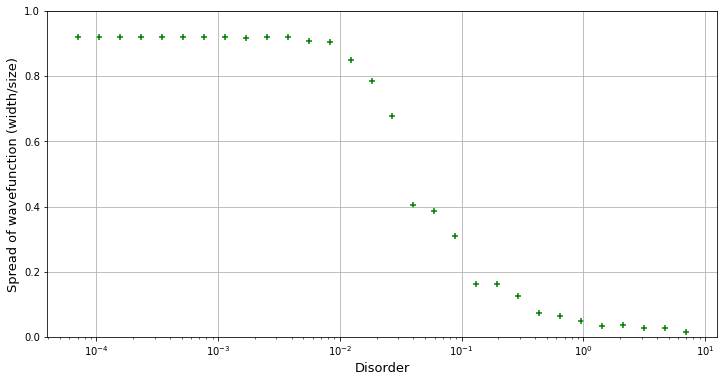

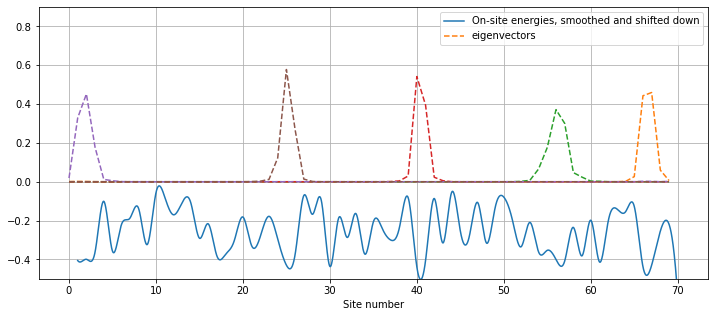

In [2]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from scipy import interpolate

def generate_hamiltonian(size, on_site_disorder,hopping_term):
    '''
    Generates Hamiltonian with random uniformly distributed
    onsite energies, flat hopping and periodic boundary conditions
    '''
    H = np.eye(size)
    onsite = on_site_disorder*(np.random.uniform(size=size)-0.5)
    H *= onsite
    hopping = np.eye(size, k=1)*hopping_term + np.eye(size, k=-1)*hopping_term
    H += hopping
    H[0,size-1] , H[size-1,0] = hopping_term, hopping_term
    return H

def delete_small(lst, bagatell_limit=0.0001):
    '''
    Takes in list of values, sets those smaller
    than a cut-off: equal to zero.
    Returns: number of elements that are not small
    '''
    spread = 0
    for index,i in enumerate(lst):
        if i < bagatell_limit:
            lst[index] = 0
        else:
            spread += 1
    return spread

def wavefunc_spread_disorder(on_site_disorder, 
                             hopping, size, 
                             num_for_spread=5):
    '''
    Sets up hamiltonian and determines average spread of the 5 
    eigenvectors that correspond to the highest eigenenergies.
    '''
    H = generate_hamiltonian(size,on_site_disorder,hopping)
    (energy_levels,eigenstates)=linalg.eigh(H)
    total_spreads = 0
    for i in range(num_for_spread):
        spread = delete_small(abs(eigenstates[:,i])**2)
        total_spreads += spread
        
    num_eigVecs_to_plot = num_for_spread
    return total_spreads/num_for_spread

def plot_eigvecs_over_potential(L=70, W=2, t=.5):
    '''
    Plots the top eigenvectors (squared), over the potential'''
    H = generate_hamiltonian(L,W,t)
    (energy_levels,eigenstates)=linalg.eigh(H)

    plt.figure(figsize=(12,5))
    x_new = np.linspace(1, L, 10000)

    y =  [H[i,i]*.2-.25 for i in range(len(H))]
    a_BSpline = interpolate.make_interp_spline(range(len(y)), y, k=3)
    y_new = a_BSpline(x_new)
    plt.plot(x_new, y_new)

    num_eigVecs_to_plot =5
    for i in range(num_eigVecs_to_plot):#np.arange(0,L,L//num_eigVecs_to_plot):
        plt.plot(range(L), abs(eigenstates[:,i])**2, ls='--')

    plt.grid()
    plt.ylim(-.5,.9)
    plt.xlabel('Site number')
    plt.legend(['On-site energies, smoothed and shifted down','eigenvectors'])
    plt.show()


def plot_spread_disorder(on_site_disorder=7, 
                         size=500, 
                         on_low=0, on_high=5, on_steps=30,
                         figsize=(12,6)):
    '''
    Plots spread-of-wavefunction as a function of Disorder
    '''

    hopping = np.logspace(on_low,on_high,on_steps)
    plt.figure(figsize=figsize)
    
    for i in hopping:
        y = wavefunc_spread_disorder(on_site_disorder,i,size,5)
        plt.scatter(on_site_disorder/i,
                    y/size, 
                    c='green', marker='+')
        
    plt.xscale('log')
    plt.xlabel('Disorder', fontsize=13)
    plt.ylabel('Spread of wavefunction (width/size)',fontsize=13)
    plt.ylim(0,1)
    plt.grid()
    
    plt.show()


plot_spread_disorder()
plot_eigvecs_over_potential()